In [1]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from astropy.io import ascii
from matplotlib.patches import Rectangle, Ellipse, Circle

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'

w51e_b6_conv_briggs = w51conv + 'w51e_briggs_B6_conv.fits'
w51e_b6_conv_robust0 = w51conv + 'w51e_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51e_superuniform_B6_conv.fits'
#----------

#w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

#w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'

catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'

w51e_dendro_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_dendro_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b6_calibrated2 = '/orange/adamginsburg/w51/alma/TaehwaYoo/w51_b6_e2_selfcal_tyoo_cont_20230822/w51e2.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal6.image.tt0.fits'
w51e_b6_calibrated = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.fits'
w51n_b6_calibrated = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.fits'



w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'






In [2]:
from matplotlib import colors
import astropy.units as u
import matplotlib as mpl
plt.rcParams['axes.labelsize']=60
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50
plt.rcParams['axes.titlesize']=60
mpl.rcParams['axes.linewidth'] = 10
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2



def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), isinside

def plot_catalog_on_image(ax,image,hdrNB,catdatadir,isb3=True,beam=None,use_criteria=True, 
                          label=None,color='cyan',lw=4,aperture='fwhm+beam',xysource=None,
                          vmin=-0.000103489713773963128,vmax=0.0022162524723021867,ls='dashed',
                         ispower=False,fontsize=100, ffcont=False):
    catdata = ascii.read(catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if isb3:
        bandlabel = '03'
    else:
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
   
    if use_criteria:
        
        rec_ind = np.where((np.abs(catdata['GOODM%s'%bandlabel])>1)&
                   (np.abs(catdata['SIGNM%s'%bandlabel])>1)&
                   (catdata['FXP_BST%s'%bandlabel]/catdata['FXP_ERR%s'%bandlabel]>=2)&
                   (catdata['FXT_BST%s'%bandlabel]/catdata['FXT_ERR%s'%bandlabel]>=2)&
                   (catdata['AFWHM%s'%bandlabel]/catdata['BFWHM%s'%bandlabel]<=2)&
                   (catdata['FOOA%s'%bandlabel]/catdata['AFWHM%s'%bandlabel]>1.15))[0]
        """
        rec_ind = np.where((np.abs(catdata['GOODM03'])>1)&
                   (np.abs(catdata['SIGNM03'])>1)&
                   (catdata['FXP_BST03']/catdata['FXP_ERR03']>2)&
                   (catdata['FXT_BST03']/catdata['FXT_ERR03']>2)&
                   (catdata['AFWHM03']/catdata['BFWHM03']<2)&
                   (catdata['FOOA03']/catdata['AFWHM03']>1.15) &
                   (np.abs(catdata['GOODM02'])>1) &
                   (np.abs(catdata['SIGNM02'])>1)&
                   (catdata['FXP_BST02']/catdata['FXP_ERR02']>2)&
                   (catdata['FXT_BST02']/catdata['FXT_ERR02']>2)&
                   (catdata['AFWHM02']/catdata['BFWHM02']<2)&
                   (catdata['FOOA02']/catdata['AFWHM02']>1.15))[0]
        """
        sky_ra= sky_ra[rec_ind]
        sky_dec = sky_dec[rec_ind]
        fooa = fooa[rec_ind]
        foob = foob[rec_ind]
        theta = theta[rec_ind]
        no = no[rec_ind]
        afwhm = afwhm[rec_ind]
        bfwhm = bfwhm[rec_ind]
    
    if label is not None:
        label = [i-1 for i in label]
        sky_ra= sky_ra[label]
        sky_dec = sky_dec[label]
        fooa = fooa[label]
        foob = foob[label]
        theta = theta[label]
        no = no[label]
        afwhm = afwhm[label]
        bfwhm = bfwhm[label]
    if ffcont:
        rescaled_3mmflux = catdata['FXT_BST03'] * catdata['AFWHM02']/catdata['AFWHM03']
        gamma = np.log10(catdata['FXT_BST02'] / rescaled_3mmflux)/np.log10(228.918/101.426)
        ffind = np.where(gamma[rec_ind]<2)[0].tolist()
    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrNB,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrNB)


    if ispower:
        ax1.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),norm=colors.PowerNorm(gamma=0.5,vmin=vmin,vmax=vmax))
    else:
        ax1.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),vmin=vmin,vmax=vmax)

    xypos = wcsNB.wcs_world2pix(skypos,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
    
    
        
    indexlist = []
    for i in range(len(xypos)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = theta[i]
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = theta[i]
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = beam.pa.value
        if i in ffind:
            ellipse = Ellipse(xypos[i],width=major,height=minor,facecolor='none',
                          angle=pa+90,edgecolor='lime',lw=lw,ls=ls)
        else:
            ellipse = Ellipse(xypos[i],width=major,height=minor,facecolor='none',
                          angle=pa+90,edgecolor=color,lw=lw,ls=ls)
        
        ax.add_patch(ellipse)
        if xysource is not None:
            numsource, indsource = count_points_in_ellipse(xpos[i],ypos[i],major,minor,pa+90,xysource[:,0],xysource[:,1])
            

            ax.text(xpos[i]+50,ypos[i]+70,'%d'%numsource,color='w',fontsize=fontsize,clip_on=True)
            indexlist.append(indsource)
    if xysource is not None:
        return indexlist
    
def plot_dendrogram(ax, catalog , wcsNB=None,legend=True, size=40,color='r' ):
    if wcsNB is not None:
        xsky = catalog['x_sky']
        ysky = catalog['y_sky']
        xysky = np.vstack((xsky, ysky)).T
        xypos = wcsNB.wcs_world2pix(xysky,0)
        xpos = xypos[:,0]
        ypos = xypos[:,1]
        
    else:
        xpos = catalog['x_pix']
        ypos = catalog['y_pix']
    print(xpos,ypos)
    kind = catalog['kind']
    
    #detected in both band
    ind1 = np.where(kind==0)[0]
    print('ind1',ind1)
    ax.scatter(xpos[ind1], ypos[ind1], s=size, marker='x',color=color,label='B3B6')
    #detected in only one band
    ind2 = np.where(kind==1)[0]
    ax.scatter(xpos[ind2], ypos[ind2], s=size-10, marker='o',color='greenyellow',label='B3')
    ind3 = np.where(kind==2)[0]
    ax.scatter(xpos[ind3], ypos[ind3], s=size-10, marker='s',color='cyan',label='B6')
    
def plot_dendrogram_new(ax, catalog , wcsNB=None,legend=True, size=80,color='cyan',band='b6',facecolor='none', index=None, vmin=None,vmax=200):
   
    if band=='b6':
        otherband='b3'
    elif band=='b3':
        otherband='b6'
    xsky = catalog['%s_xsky'%band]
    ysky = catalog['%s_ysky'%band]
    xysky = np.vstack((xsky, ysky)).T
    xypos = wcsNB.wcs_world2pix(xysky,0)
    if index is None:
        index = np.arange(len(xsky))
    xpos = xypos[index,0]
    ypos = xypos[index,1]
    
    xsky_otherband = catalog['%s_xsky'%otherband]
    ysky_otherband = catalog['%s_ysky'%otherband]
    xysky_otherband = np.vstack((xsky_otherband, ysky_otherband)).T
    xypos_otherband = wcsNB.wcs_world2pix(xysky_otherband,0)
    xpos_otherband = xypos_otherband[index,0]
    ypos_otherband = xypos_otherband[index,1]

    cmap = plt.get_cmap('viridis')
    xarr = [] ; yarr = []
    for i in range(len(xpos)):
        if xsky[i]<0:
            xarr.append(xpos_otherband[i])
            yarr.append(ypos_otherband[i])
        else:
           
            xarr.append(xpos[i])
            yarr.append(ypos[i])

    if vmin is None:
        ax.scatter(xarr,yarr, s=size, marker='o',c=color)
    else:
        ss = ax.scatter(xarr,yarr, s=size, marker='o',c=color[index],cmap=cmap,vmin=vmin,vmax=vmax)
    if vmin is not None:
        return ss
                        
def plot_dendrogram_circle(ax, catalog , wcsNB=None,legend=True, size=80,color='cyan',band='b6',lw=4,fill=False):
    if band=='b6':
        otherband='b3'
    elif band=='b3':
        otherband='b6'
    xsky = catalog['%s_xsky'%band]
    ysky = catalog['%s_ysky'%band]
    xysky = np.vstack((xsky, ysky)).T
    xypos = wcsNB.wcs_world2pix(xysky,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
    
    xsky_otherband = catalog['%s_xsky'%otherband]
    ysky_otherband = catalog['%s_ysky'%otherband]
    xysky_otherband = np.vstack((xsky_otherband, ysky_otherband)).T
    xypos_otherband = wcsNB.wcs_world2pix(xysky_otherband,0)
    xpos_otherband = xypos_otherband[:,0]
    ypos_otherband = xypos_otherband[:,1]

 
    for i in range(len(xpos)):
        if xsky[i]<0:
            color='magenta'
            x = xpos_otherband[i]
            y = ypos_otherband[i]
        elif catalog['%s_xsky'%otherband][i]<0:
            color='yellow'
            x = xpos[i]
            y = ypos[i]
        elif catalog['alpha'][i]<1.7:
            color='springgreen'
            x = xpos[i]
            y = ypos[i]
        else:
            color='cyan'
            x = xpos[i]
            y = ypos[i]
        circle = Circle((x,y),radius=size, color=color,facecolor='none',lw=lw,fill=fill)
        ax.add_patch(circle)
        
def plot_dendrogram_arrow(ax, catalog ,extent=[],downarrow=[], temp=[],wcsNB=None,legend=True, size=80,color='cyan',band='b6',lw=4,fill=False,xsort=True):
    if band=='b6':
        otherband='b3'
    elif band=='b3':
        otherband='b6'
    xsky = catalog['%s_xsky'%band]
    ysky = catalog['%s_ysky'%band]
    xysky = np.vstack((xsky, ysky)).T
    xypos = wcsNB.wcs_world2pix(xysky,0)
    
    xpos = xypos[:,0]
    ypos = xypos[:,1]
    
    xsky_otherband = catalog['%s_xsky'%otherband]
    ysky_otherband = catalog['%s_ysky'%otherband]
    xysky_otherband = np.vstack((xsky_otherband, ysky_otherband)).T
    xypos_otherband = wcsNB.wcs_world2pix(xysky_otherband,0)
    xpos_otherband = xypos_otherband[:,0]
    ypos_otherband = xypos_otherband[:,1]
    
    x_both = np.array([xpos[i] if xsky[i]>0 else xpos_otherband[i] for i in range(len(xpos))])
    y_both = np.array([ypos[i] if xsky[i]>0 else ypos_otherband[i] for i in range(len(xpos))])

    
    insideind = np.where((x_both>extent[0])&(x_both<extent[1])&(y_both>extent[2])&(y_both<extent[3]))[0]
    
    x_both_inside = x_both[insideind]
    y_both_inside = y_both[insideind]
    
    if xsort:
        sortind = np.argsort(x_both_inside)
    else:
        sortind = np.argsort(y_both_inside)
    
    x_both_inside = x_both_inside[sortind]
    y_both_inside = y_both_inside[sortind]

        
    temp_inside = temp[insideind][sortind]    
 
    for i in range(len(x_both_inside)):
       
        if i in downarrow:
            arrowoffset = -50
        else:
            arrowoffset = 50
        if np.isfinite(temp_inside[i]):         
            ax.annotate("%d K"%temp_inside[i] ,xy=(x_both_inside[i],y_both_inside[i]+arrowoffset/7), xycoords='data', textcoords='offset pixels',
                        arrowprops=dict(width=8, headwidth=20,ec=color,fc=color, ),xytext=(0,arrowoffset),fontsize=30,color=color)

                        
def add_scale_bar(ax, xpos,ypos,scale, pixel_scale, dist,height=20,color='w',pad=40,size=40,xoffset=0.05):
    phy_pix_scale = (pixel_scale * dist).to(u.kpc*u.rad)/u.rad
    print(phy_pix_scale.to(u.au))
    scaled_scale = (scale/phy_pix_scale).to(u.rad/u.rad)
    print(scaled_scale)
    ax.add_patch(Rectangle((xpos,ypos),scaled_scale,height,color=color))
    
    ax.text(xpos+(0.4+xoffset)*scaled_scale, ypos+pad, f"{scale}", color=color,fontsize=size)
    
   

def add_beam(ax,xpos,ypos,beam, pixel_scale,color='w',square=False,square_size=800):
    width = beam.major / pixel_scale
    height = beam.minor /pixel_scale
    angle = beam.pa
    ax.add_patch(Ellipse((xpos,ypos),width.value,height.value,angle.value+90,color=color))
    if square:
        ax.scatter(xpos,ypos,facecolor='none', edgecolor=color,s=square_size,marker='s')


324.60000000006494 AU
63.5443026022967


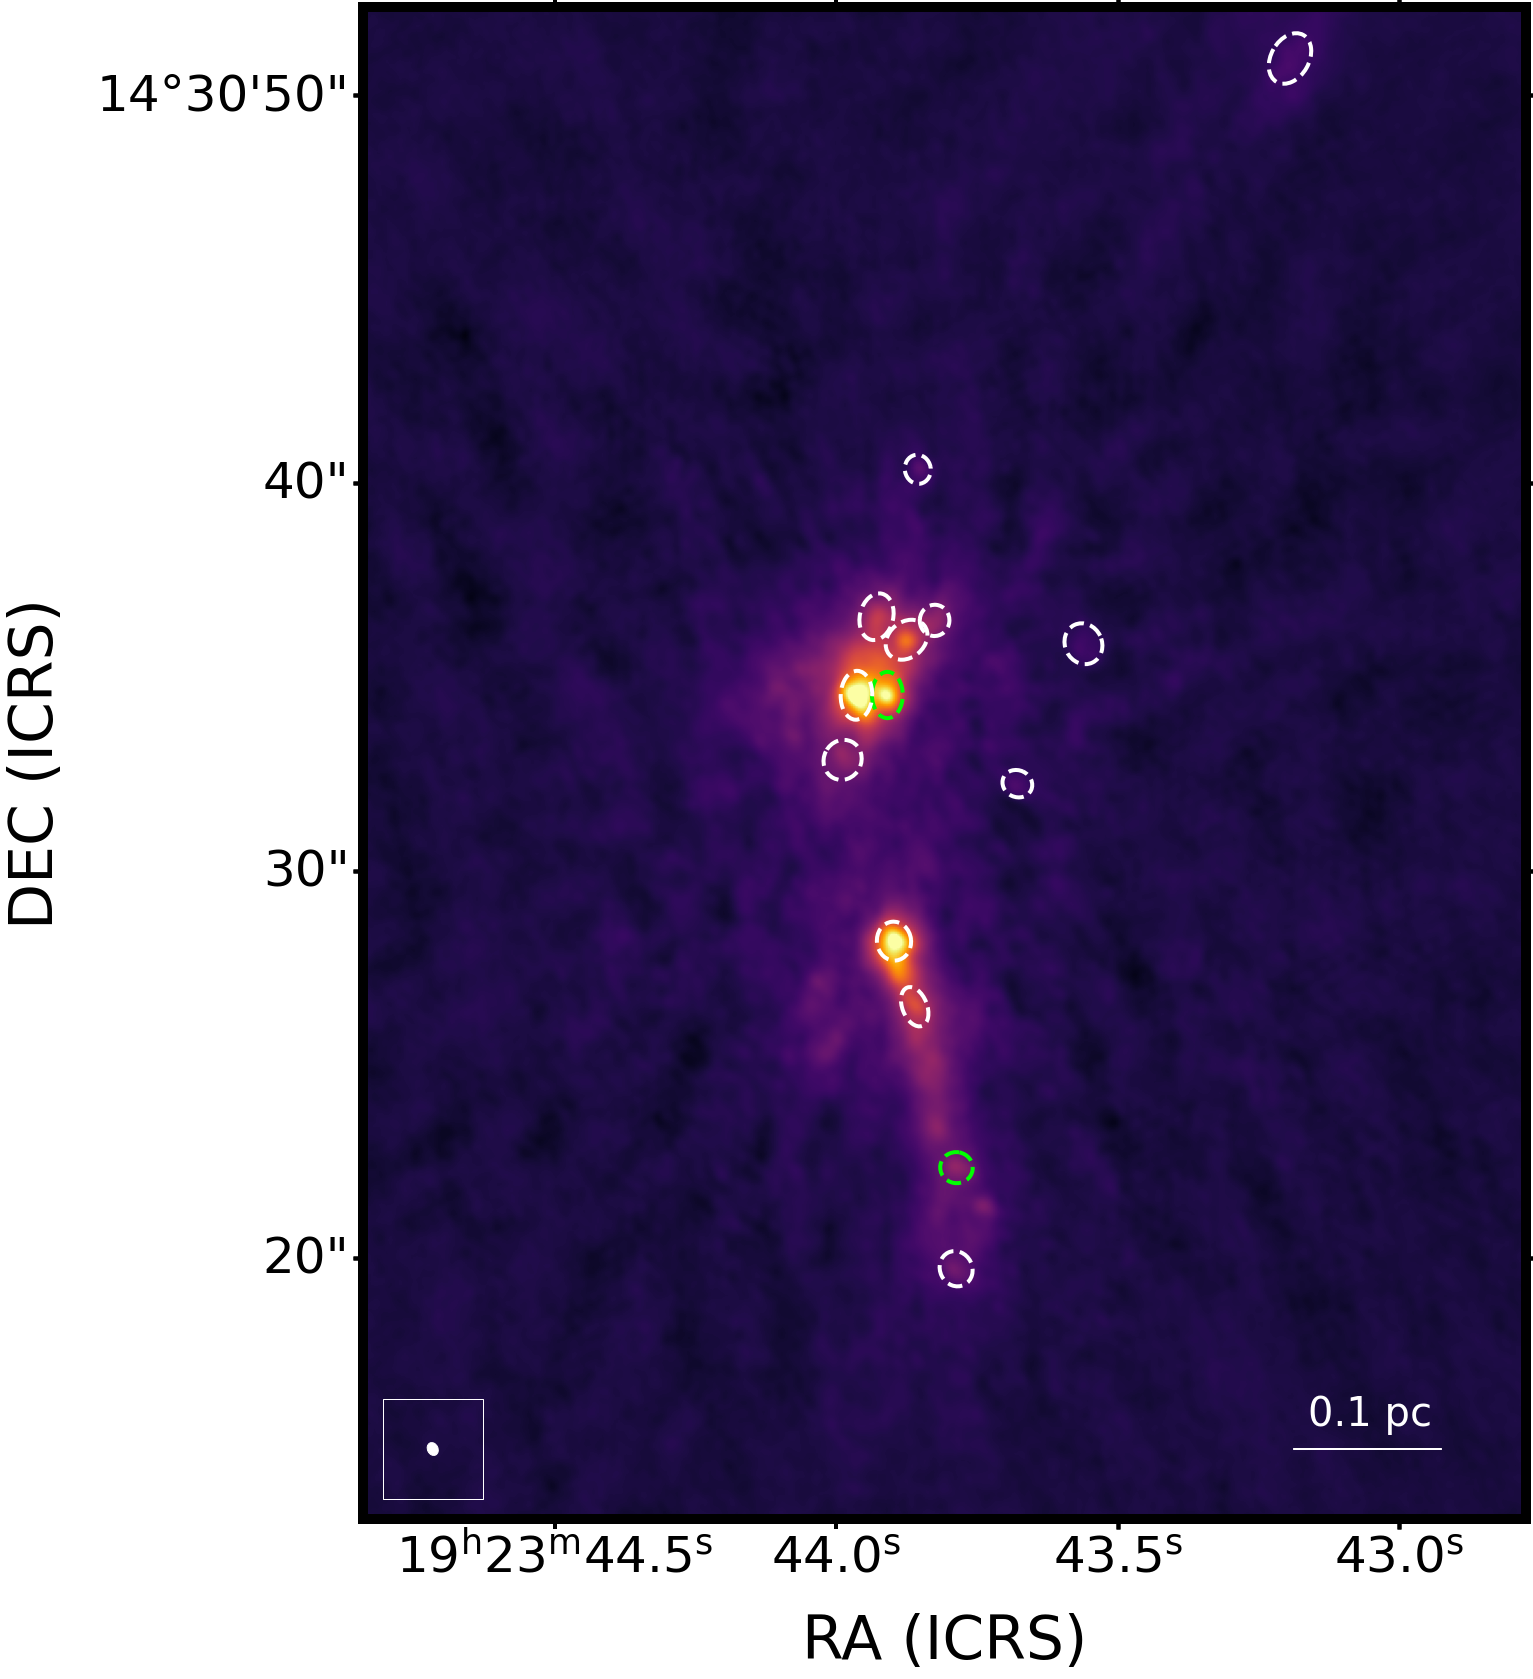

In [3]:
        
fitsdata_almaimf = fits.open(w51e_b6_almaimf)
image_almaimf = fitsdata_almaimf[0].data
if len(image_almaimf.shape)>2:
    image_almaimf = fitsdata_almaimf[0].data[0][0]
hdr_almaimf = fits.getheader(w51e_b6_almaimf)  
beam_almaimf = Beam.from_fits_header(hdr_almaimf)

wcs_almaimf = WCS(hdr_almaimf,naxis=2)
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.3,0.3,0.7,0.7],projection=wcs_almaimf)
plot_catalog_on_image(ax1,image_almaimf,hdr_almaimf,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.0035380786497514836, vmax=0.2914974178034381, ispower=True)
scale_almaimf = wcs_almaimf.proj_plane_pixel_scales()[0]
    
add_beam(ax1,830,730, beam_almaimf, scale_almaimf,square=True,square_size=10000)
add_scale_bar(ax1, 1200, 730, 0.1*u.pc, scale_almaimf,5.41*u.kpc, xoffset=-0.3,height=0.5,pad=10)
    

ax1.set_xlim(800,1300)    
ax1.set_ylim(700,1350)    
ax1.set_xlabel('RA (ICRS)')
ax1.set_ylabel('DEC (ICRS)')
 

plt.savefig('W51E-fragment1.png')

<class 'numpy.ma.core.MaskedArray'>
[71.65969821697556, nan, nan, nan, 166.58172068058562, nan, nan, nan, 171.55036463586305, 84.93220508013916, 101.92764027473198, 87.53353107857728, nan, 33.128501044174946, 32.21684017936839, 62.17504771159095, 30.85431721295735, 25.51348630550755, 146.00766317328782, 37.137233226279314, 32.489875738771836, 31.23594564336307, nan, 141.7560238114926, 44.6161125911888, 68.72705075647922, nan, 114.8441059212575, nan, 0.9905947960137058, 0.9905947960137058, nan, nan, nan, nan, 20.440080015019927, 46.96770506752097, 83.47372966092493, 97.33892345855888, 26.86660130583473, 381.16776317415827, nan, nan, 52.87811473221881, nan, 61.08208894885835, 146.67846748531554, 34.37964450112769, 123.15279653823286, 48.06117430596821, 87.97695297870894, nan, nan, 40.03410888593558, 33.8185837519213, 50.90343878090602, 21.030715702271593, 56.33491330305457, 69.17910404609677, 67.33563629998497, 82.39565388059991, 64.42650586874701, 108.63115871660565, 51.91559569757126, 

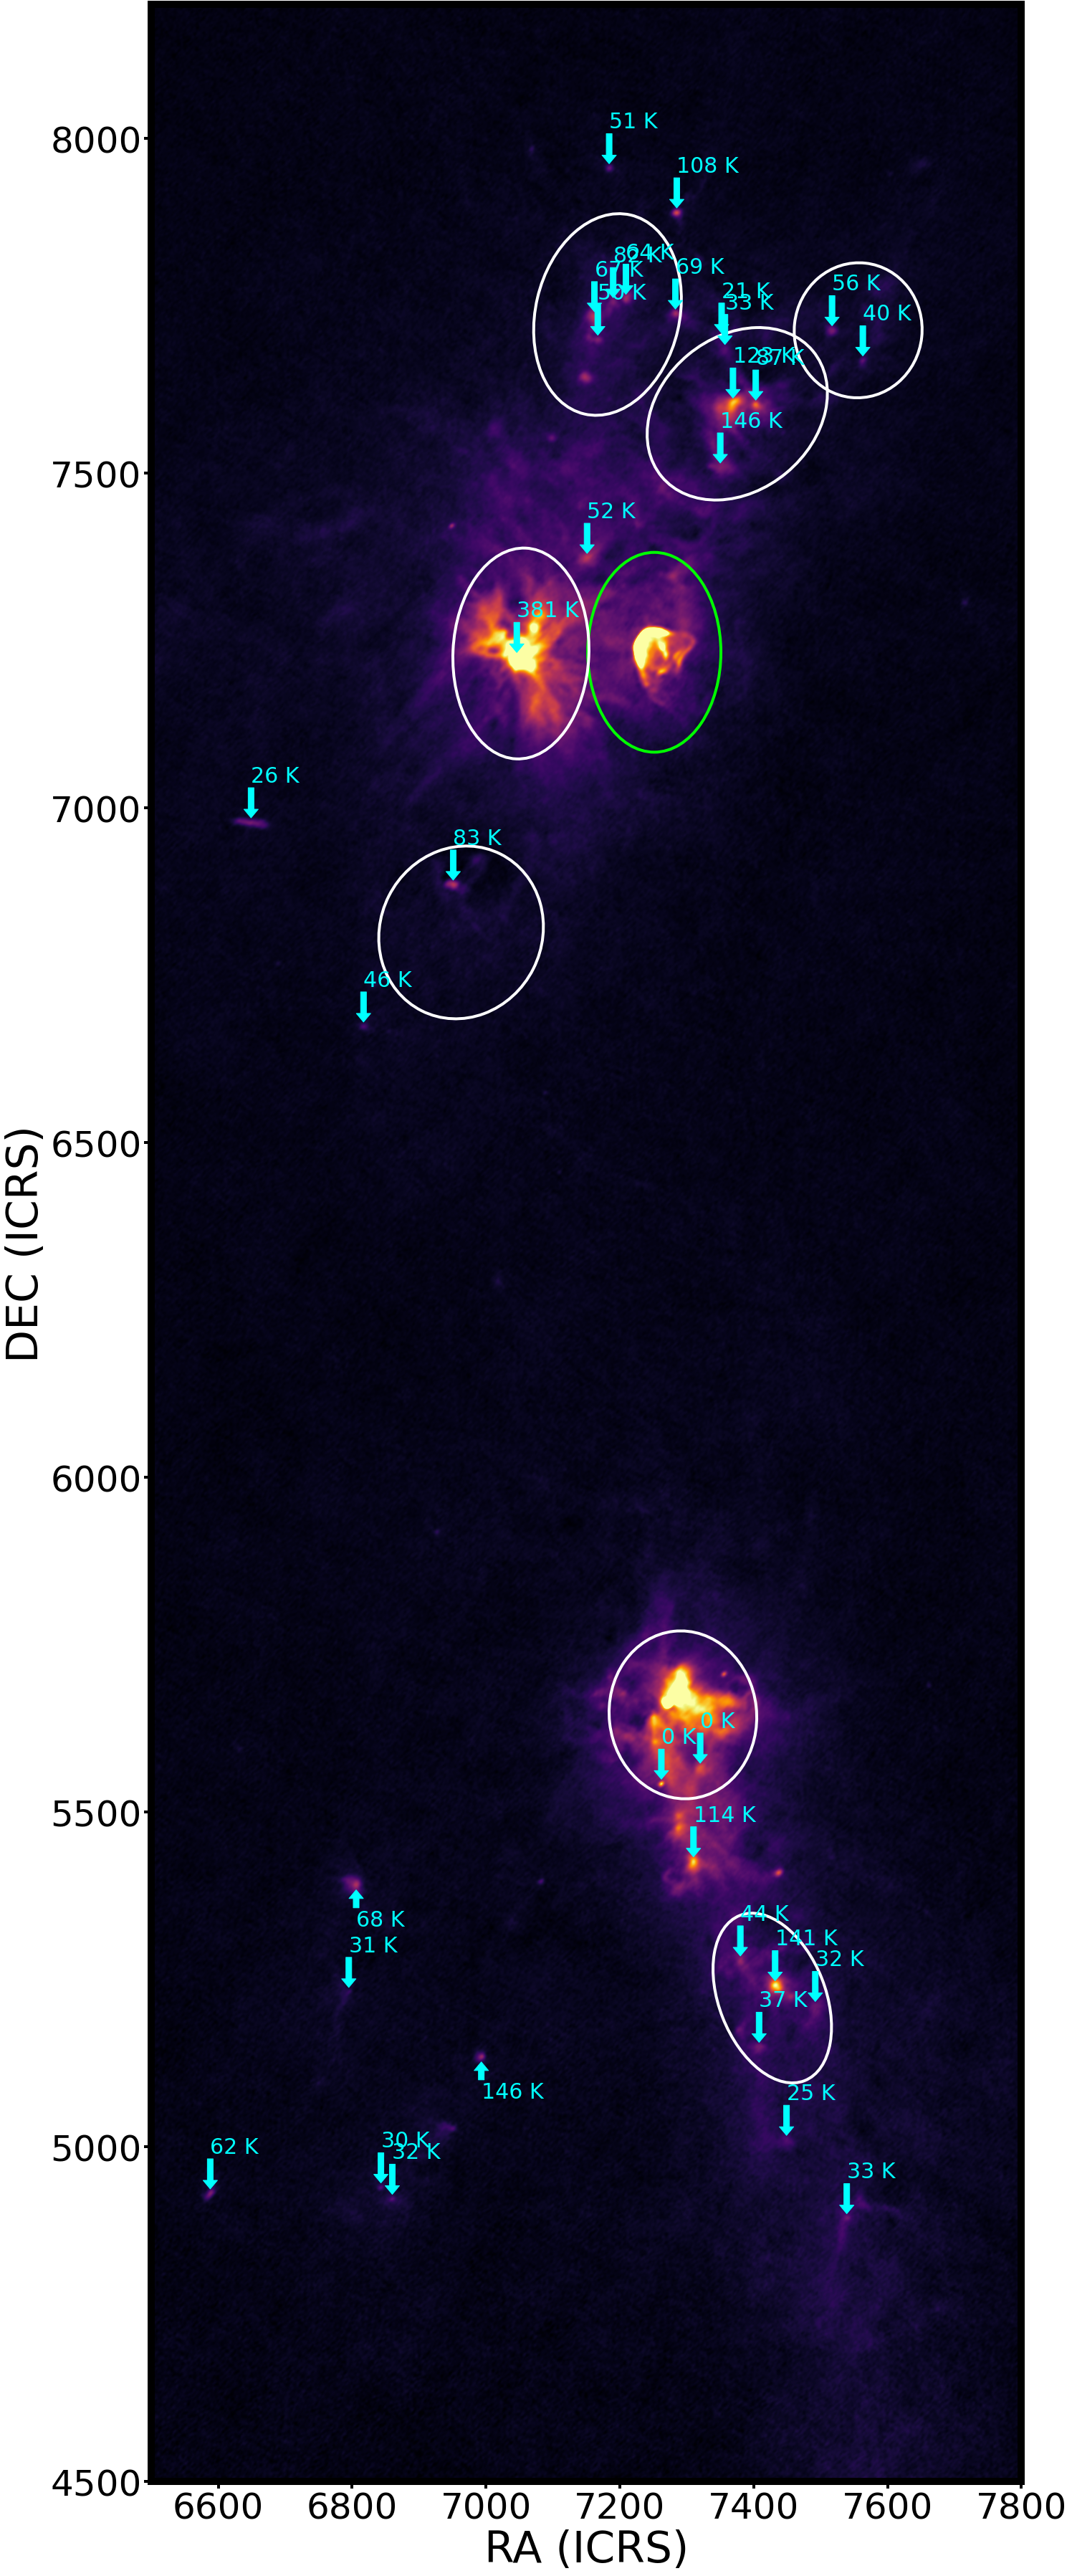

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fitsdata_highres = fits.open(w51e_b6_calibrated_pbcor)
image_highres = fitsdata_highres[0].data
if len(image_highres.shape)>2:
    image_highres = fitsdata_highres[0].data[0][0]
hdr_highres = fits.getheader(w51e_b6_calibrated_pbcor)  
beam_highres = Beam.from_fits_header(hdr_highres)

wcs_highres = WCS(hdr_highres,naxis=2)

scale_highres = wcs_highres.proj_plane_pixel_scales()[0]
catalog = Table.read(w51e_dendro_matched_catalog,format='fits')
temp_table = catalog['BBtemp']
hightemp = np.where(temp_table.data>4e3)
temp_table.mask[hightemp]=True
temp = temp_table.data
print(type(temp))
templist = temp.tolist(fill_value=np.nan)
print(templist)

fig = plt.figure(figsize=(60,60))
ax1 = fig.add_axes([0.2,0.2,0.8,0.8])
plot_catalog_on_image(ax1,image_highres,hdr_highres,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.00015829157200641937, vmax=0.00472556868900092, ls='solid')
plot_dendrogram_arrow(ax1, catalog, extent=[6500,7800,4500,8200],downarrow=[6,12,18,], temp=np.array(templist),wcsNB = wcs_highres,size=20)


scale_almaimf = wcs_almaimf.proj_plane_pixel_scales()[0]
"""
axins1 = inset_axes(
            ax1,
            width="35%",  # width: 50% of parent_bbox width
            height="1%",  # height: 5%
            loc="upper center",
            )
axins1.xaxis.set_ticks_position("bottom")
axcbr = fig.colorbar(ss, cax=axins1, orientation="horizontal", ticks=[0, 100, 200])
axcbr.set_label('temperature (K)', color='w')
axcbr.ax.yaxis.set_tick_params(color='w')
axcbr.outline.set_edgecolor('w')
plt.setp(plt.getp(axcbr.ax.axes, 'xticklabels'), color='w')
"""

#add_beam(ax1,830,730, beam_almaimf, scale_almaimf,square=True,square_size=10000)
#add_scale_bar(ax1, 1200, 730, 0.1*u.pc, scale_almaimf,5.41*u.kpc, xoffset=-0.3,height=0.5,pad=10)
    

ax1.set_xlim(6500,7800)
ax1.set_ylim(4500,8200)   
ax1.set_xlabel('RA (ICRS)')
ax1.set_ylabel('DEC (ICRS)')
 
plt.savefig('tempmap.png')

In [ ]:

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.0,0.0,1.0,1.0])
plot_catalog_on_image(ax1,image_highres,hdr_highres,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.00015829157200641937, vmax=0.00472556868900092)
plot_dendrogram_arrow(ax1, catalog, extent=[6700,7700,7000,7900],downarrow=[6,12,18,],wcsNB = wcs_highres,size=20)
add_beam(ax1,6800,7100, beam_highres, scale_highres,square=True,square_size=10000)
add_scale_bar(ax1, 7550, 7100, 1e3*u.au, scale_highres,5.41*u.kpc, xoffset=-1,height=4,pad=15)
ax1.set_xlim(6700,7700)    
ax1.set_ylim(7000,7900)
ax1.set_xticks([])
ax1.set_yticks([])

circle = Circle((0,0),radius=0, ls='dashed', color='w', label=r'core ($\alpha>2$)',lw=4, fill=False)
ax1.add_patch(circle)
circle = Circle((0,0),radius=0, ls='dashed', color='lime', label=r'core ($\alpha<2$)',lw=4, fill=False)
ax1.add_patch(circle)
circle = Circle((0,0),radius=0,  color='cyan', label=r'YSO ($\alpha>1.7$)',lw=4,)
ax1.add_patch(circle)
circle = Circle((0,0),radius=0,  color='springgreen', label=r'YSO ($\alpha<1.7$)',lw=4, )
ax1.add_patch(circle)
circle = Circle((0,0),radius=0,  color='magenta', label='B3 only',lw=4, )
ax1.add_patch(circle)
circle = Circle((0,0),radius=0,  color='yellow', label='B6 only',lw=4, )
ax1.add_patch(circle)
#ax1.set_xlabel('RA (ICRS)')
#ax1.set_ylabel('DEC (ICRS)')
ax1.legend(loc='upper left',fontsize=40,frameon=False, labelcolor='w')
plt.savefig('W51E-fragment2_arrow.png')

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.0,0.0,1.0,1.0])
plot_catalog_on_image(ax1,image_highres,hdr_highres,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.00007221506578695015, vmax=0.0008449317463340403)
catalog = Table.read(w51e_dendro_matched_catalog,format='fits')
plot_dendrogram_arrow(ax1, catalog, extent=[6200,7200,6500,7200],downarrow=[5,7,10],wcsNB = wcs_highres,size=20)
add_beam(ax1,6300,6600, beam_highres, scale_highres,square=True,square_size=10000)
add_scale_bar(ax1, 7050, 6600, 1e3*u.au, scale_highres,5.41*u.kpc, xoffset=-1,height=4,pad=15)
ax1.set_xlim(6200,7200)    
ax1.set_ylim(6500,7200)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.set_xlabel('RA (ICRS)')
#ax1.set_ylabel('DEC (ICRS)')
plt.savefig('W51E-fragment3_arrow.png')

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.0,0.0,1.0,1.0])
plot_catalog_on_image(ax1,image_highres,hdr_highres,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.0001582915720064193, vmax=0.0051303084896368875)
catalog = Table.read(w51e_dendro_matched_catalog,format='fits')
plot_dendrogram_arrow(ax1, catalog, extent=[7000,7550,5050,5800],downarrow=[9,11,13],wcsNB = wcs_highres,size=20, xsort=False)
add_beam(ax1,7050,5080, beam_highres, scale_highres,square=True,square_size=10000)
add_scale_bar(ax1, 7420, 5080, 1e3*u.au, scale_highres,5.41*u.kpc, xoffset=-1,height=4,pad=15)
ax1.set_xlim(7000,7550)    
ax1.set_ylim(5050,5800)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.set_xlabel('RA (ICRS)')
#ax1.set_ylabel('DEC (ICRS)')
plt.savefig('W51E-fragment4_arrow.png')

In [ ]:

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.0,0.0,1.0,1.0])
plot_catalog_on_image(ax1,image_highres,hdr_highres,cat_w51e,isb3=False,beam=beam_almaimf,use_criteria=True,ffcont=True,color='w',
                     vmin=-0.00015829157200641937, vmax=0.00472556868900092)
plot_dendrogram_arrow(ax1, catalog, extent=[7000,7700,7450,7900],downarrow=[2,7,15],wcsNB = wcs_highres,size=20,xsort=False)
add_beam(ax1,7050,7500, beam_highres, scale_highres,square=True,square_size=10000)
add_scale_bar(ax1, 7550, 7500, 1e3*u.au, scale_highres,5.41*u.kpc, xoffset=-1,height=4,pad=15)
ax1.set_xlim(7000,7700)    
ax1.set_ylim(7450,7900)
ax1.set_xticks([])
ax1.set_yticks([])

#ax1.set_xlabel('RA (ICRS)')
#ax1.set_ylabel('DEC (ICRS)')
plt.savefig('W51E-fragment22_arrow.png')